# Final Project for Time Series and Survival Analysis

## Specialized Models: Time Series and Survival Analysis

[Data Source](https://www.kaggle.com/datasets/rahulsah06/gooogle-stock-price)

<br />
<hr />

    Mustafa Tayyip BAYRAM
     September 16, 2022
<hr />
<br />

## Objective
The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market.


## Data Set Contents
Date : Date of the price (row)
Open : Value of opening stock price
High: High Value of stock price
Low: Low Value of stock price
Close: Last (closing) Value of stock price

## Notebook Contents
1. Importing Packages
2. Feature Engineering
3. Feature Transformation
4. Extracting Time Series Components
5. Checking for Stationary, White Noise, Random walk
6. Smoothing (Simple Avg, Moving Avg, Exponentially Weighted Moving Avg)
7. Forecasting with SARIMA Model
8. Forecasting with Deep Learning Models ( RNN, LSTM)
9. Results
10. Future planning



## 1. Importing packages

In [235]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import statsmodels.api as sm
from datetime import datetime
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## 2.  Feature Engineering

In [236]:
df_train = pd.read_csv('data/Google_Stock_Price_Train.csv')
df_test = pd.read_csv('data/Google_Stock_Price_Test.csv')

df_train.sample(20)

,Date,Open,High,Low,Close,Volume
69,4/12/2012,319.98,325.35,318.93,649.23,"11,556,300"
492,12/17/2013,534.41,538.36,532.20,"1,066.93","3,082,800"
1193,9/29/2016,781.44,785.80,774.23,775.01,"1,314,700"
1230,11/21/2016,762.61,769.70,760.60,769.2,"1,330,600"
892,7/22/2015,660.89,678.64,659.00,662.1,"3,929,300"
33,2/21/2012,300.81,307.79,300.31,612.32,"4,980,100"
708,10/27/2014,535.56,542.92,535.56,539.29,"1,185,300"
532,2/14/2014,595.57,599.95,594.17,"1,199.51","4,389,700"
117,6/20/2012,288.82,288.92,285.68,575.93,"4,710,800"
1144,7/21/2016,740.36,741.69,735.83,738.63,"1,026,300"


In [237]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


(None, None)

In [238]:
df_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [239]:
df_test.isnull().sum()
df_train.isnull().sum() # Great, we don't have any null value.

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [240]:
df_train.dtypes, df_test.dtypes

(Date       object
 Open      float64
 High      float64
 Low       float64
 Close      object
 Volume     object
 dtype: object,
 Date       object
 Open      float64
 High      float64
 Low       float64
 Close     float64
 Volume     object
 dtype: object)

<i> We need to fix date and Close as they are not proper. Close is string  </i>

## 3. Feature Transformation

In [241]:
df_train['Date'] = pd.to_datetime(df_train['Date'])     # As we can see, date format is not proper. It should be YYYY/MM/DD.
df_test['Date'] = pd.to_datetime(df_test['Date'])

df_train['Close'] = df_train['Close'].str.replace(',','')
df_train['Close'] = df_train['Close'].apply(lambda x : float(x))

# We don't need for test, they are already float.
# df_test['Close'] = df_test['Close'].str.replace(',','')
# df_test['Close'] = df_test['Close'].apply(lambda x : float(x))

df_train.sample(5)

,Date,Open,High,Low,Close,Volume
795,2015-03-04,570.30,575.53,566.45,571.80,"1,876,800"
252,2013-01-04,363.31,369.35,362.48,735.95,"5,547,600"
28,2012-02-13,304.11,305.77,303.87,610.52,"3,646,100"
954,2015-10-19,661.18,666.82,659.58,666.10,"1,477,300"
9,2012-01-17,314.81,314.81,311.67,626.86,"3,832,800"


<i> We need to put the date as an index as it's time series </i>

In [242]:
df_train.set_index(df_train['Date'], inplace=True)
df_test.set_index(df_test['Date'], inplace=True)
df_train.drop(columns=['Date'], inplace=True)
df_test.drop(columns=['Date'], inplace=True)
df_train.sample(5)

,Open,High,Low,Close,Volume
Date,,,,,
2015-10-07,649.24,650.61,632.15,642.36,"2,092,700"
2015-02-12,535.78,543.33,533.21,541.44,"1,620,200"
2012-05-25,299.38,299.74,293.04,589.91,"7,190,500"
2015-11-04,722.00,733.10,721.90,728.11,"1,706,700"
2014-06-16,547.76,548.12,540.04,542.79,"1,702,500"


In [243]:
df_test.sample(5)

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,796.86,801.25,790.52,796.79,"2,160,600"
2017-01-13,807.48,811.22,806.69,807.88,"1,099,200"
2017-01-18,805.81,806.21,800.99,806.07,"1,294,400"
2017-01-12,807.14,807.39,799.17,806.36,"1,353,100"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"


In [244]:
# Closing column is important for us, we are just going to use it.
df_train_close = df_train[['Close']]
df_test_close = df_test[['Close']]

df_train_close.sample(5)

,Close
Date,
2013-02-04,756.94
2013-03-05,836.30
2015-02-19,541.38
2014-07-28,588.98
2015-06-29,521.52


In [245]:
# We may use this helper method for future plotting.
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)

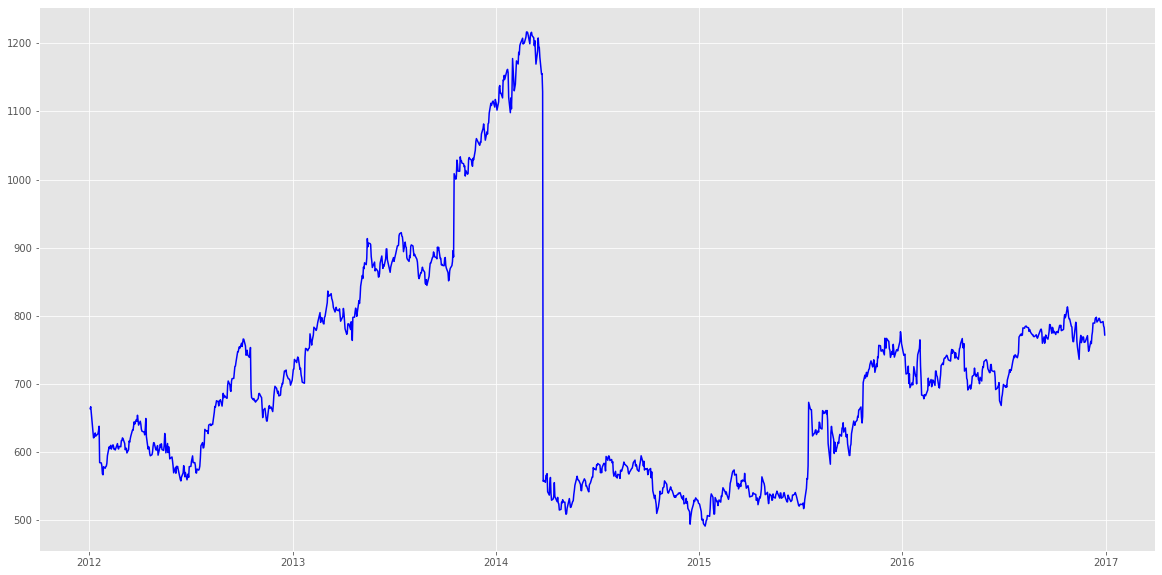

In [246]:
plt.figure(figsize=(20,10))
plt.plot(df_train_close, 'b')

## 4. Extracting Time Series Components

According to the plotting, trend is independent to the seasonality and residuals

In [247]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=df_train_close, model='additive', period=5)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

### <i> Let's visualize them. </i>

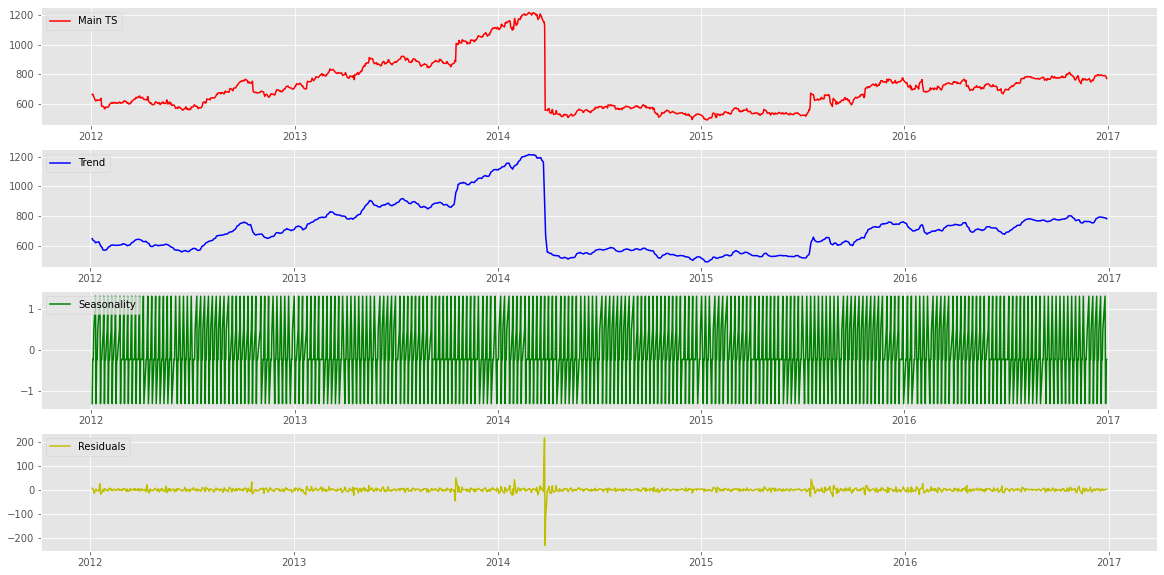

In [248]:
fig, axes = plt.subplots(4, 1,figsize=(20, 10) )

axes[0].plot(df_train_close, label='Main TS', c='r')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend',c='b')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality', c='g')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals', c='y')
axes[3].legend(loc='upper left');

## 5. Checking for Stationary, White Noise, Random walk

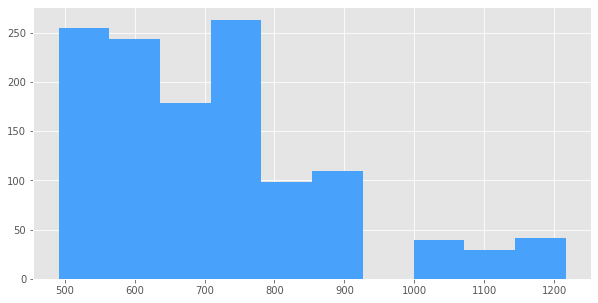

In [249]:
pd.Series(df_train_close['Close']).hist(color='#48A1FA', figsize=(10, 5));

It doesn't seem that there is a constant mean. We need to fix it.

In [250]:
df_train_close.shape[0] % 17    # Mod 17 is 0 so we can divide into it 17 equaled chunks

0

In [251]:
chunks = np.split(df_train_close['Close'], indices_or_sections=17)

means = np.round(np.mean(chunks, axis=1),2)
stds = np.round(np.std(chunks, axis=1),2)

chunks_df = pd.DataFrame({"chunks": list(range(1, len(chunks)+1)), "mean_vals":means, "variance_vals":stds })
chunks_df

,chunks,mean_vals,variance_vals
0,1,616.89,22.53
1,2,591.88,20.36
2,3,694.50,37.90
3,4,738.35,46.24
4,5,838.95,40.99
5,6,883.09,18.03
6,7,1050.52,73.07
7,8,902.00,320.94
8,9,565.37,18.40
9,10,553.58,21.37


There is heteroscedascity and a bit lack of constant mean.

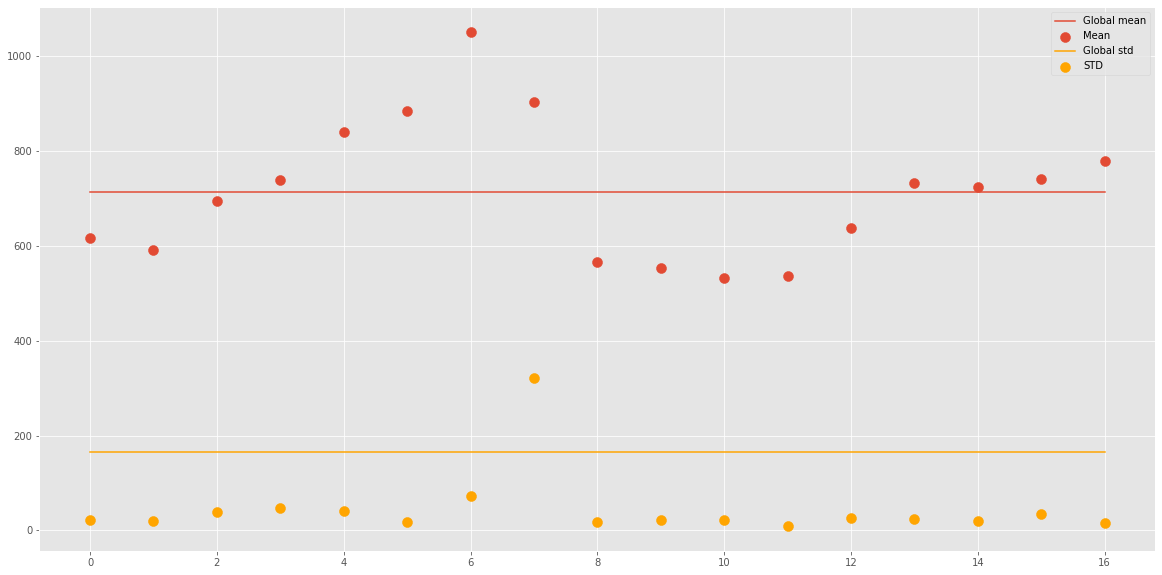

In [252]:
# comparing between means and standard deviations of time series chunks
mean_time_axis = np.arange(len(means))
std_time_axis = np.arange(len(stds))

# graph preferences
plt.rcParams["figure.figsize"] = (20,10)
plt.title = 'White Noise Mean and Standard Deviation Comparison'

# plotting the actual mean of time series
plt.plot(mean_time_axis, [df_train_close.mean()] * len(means),
         label='Global mean', lw=1.5)

# plotting the chunked means
plt.scatter(mean_time_axis, y=means, label='Mean', s=100)

# plotting the actual standard deviation of time series
plt.plot(std_time_axis, [df_train_close.std()] * len(stds),
         label='Global std', lw=1.5, color='orange')

# plotting the chunked standard deviations
plt.scatter(std_time_axis, y=stds, label='STD', color='orange', s=100)

plt.legend();

### <i> We also need to check autocorrelation </i>

In [253]:
from statsmodels.graphics.tsaplots import acf, plot_acf

ac_values = np.round(acf(df_train_close['Close'], fft=False), 2)
ac_values

array([1.  , 0.99, 0.99, 0.98, 0.97, 0.96, 0.96, 0.95, 0.94, 0.93, 0.92,
       0.92, 0.91, 0.9 , 0.89, 0.88, 0.87, 0.86, 0.86, 0.85, 0.84, 0.83,
       0.82, 0.81, 0.8 , 0.79, 0.78, 0.78, 0.77, 0.76, 0.75])

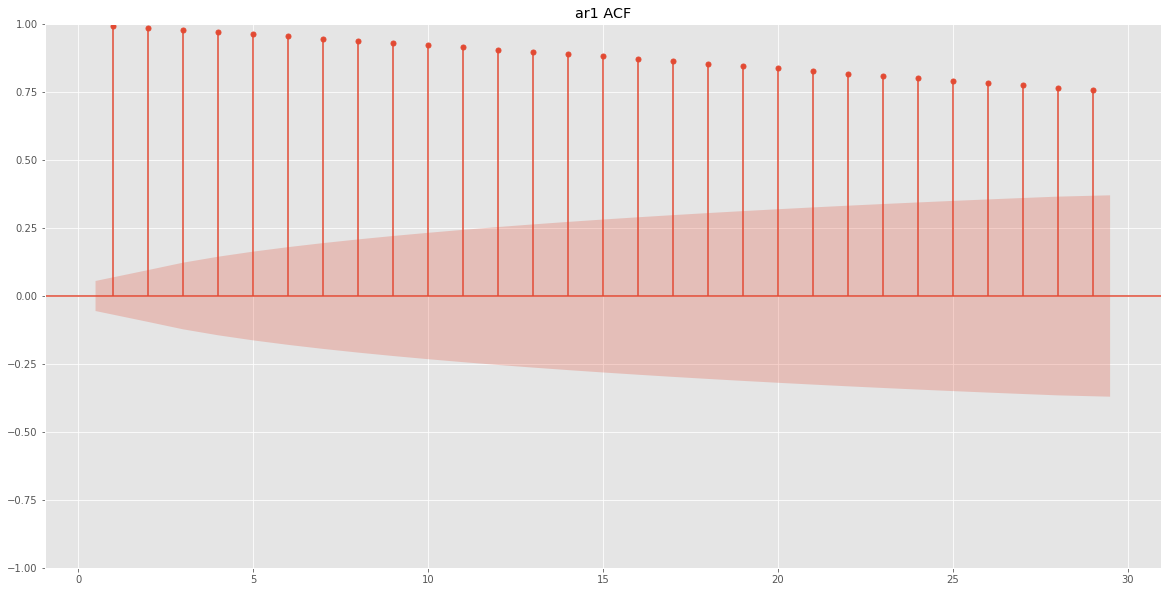

In [254]:
fig = sm.tsa.graphics.plot_acf(df_train_close['Close'], lags=range(1,30), alpha=0.05,title = 'ar1 ACF')

I reaaly don't know what is this. But, let's apply differentiation

In [255]:
df_train_close['Close_Diff'] = df_train_close['Close'].diff(periods=1)
df_train_close = df_train_close.dropna()

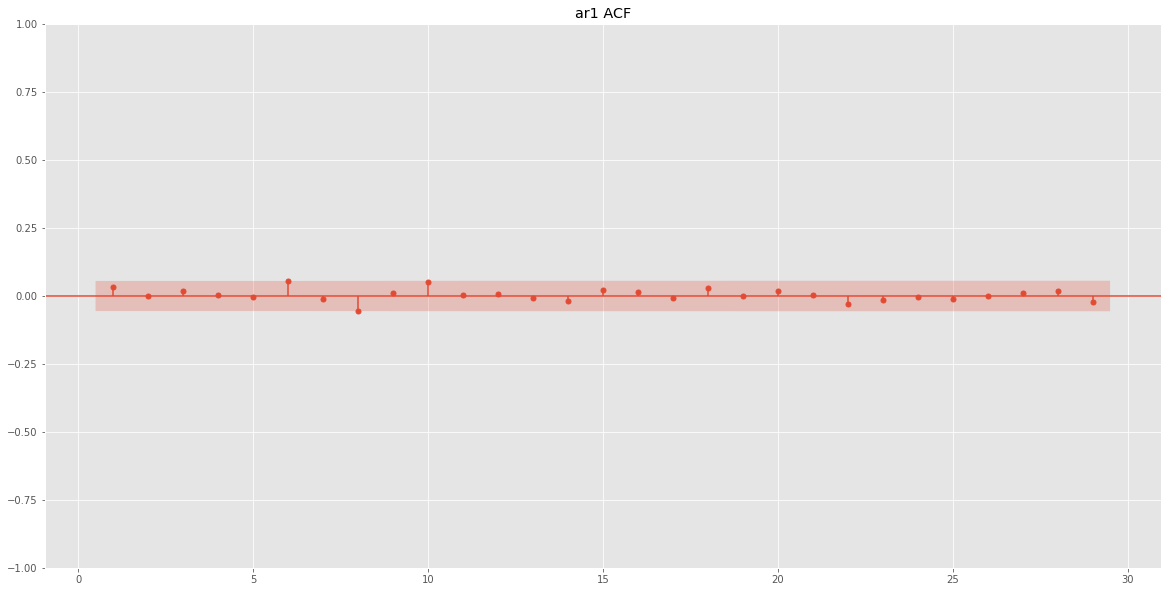

In [256]:
fig = sm.tsa.graphics.plot_acf(df_train_close['Close_Diff'], lags=range(1,30), alpha=0.05,title = 'ar1 ACF')

It seems nice.

### <i> Let's also examine Partial Autocorrelation

In [257]:
from statsmodels.graphics.tsaplots import pacf, plot_pacf

pacf_values = pacf(df_train_close['Close'], nlags=30)
np.round(pacf_values, 2)

array([ 1.  ,  0.99, -0.05, -0.  , -0.03, -0.01,  0.  , -0.07,  0.01,
        0.06, -0.02, -0.06, -0.02, -0.01,  0.01,  0.01, -0.03, -0.01,
        0.01, -0.04, -0.  , -0.03, -0.  ,  0.03,  0.  , -0.  ,  0.01,
       -0.01, -0.02, -0.03,  0.02])

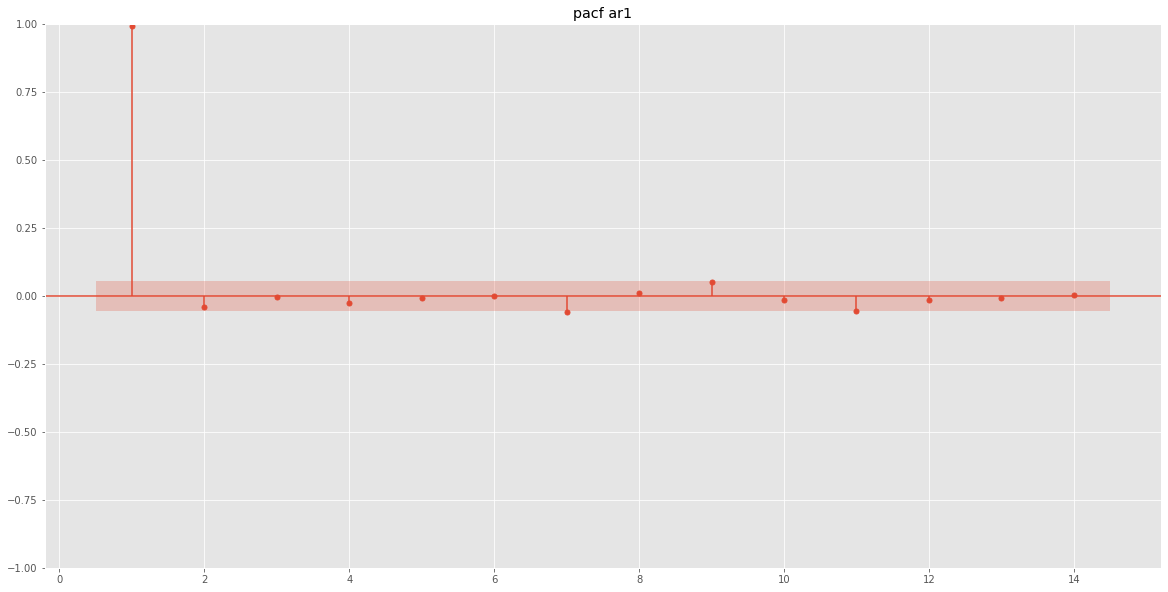

In [258]:
fig = sm.tsa.graphics.plot_pacf(df_train_close['Close'], lags=range(1,15), alpha=0.05, title = 'pacf ar1')

partial autocorrelation on first-order difference

In [259]:
pacf_values = pacf(df_train_close['Close_Diff'], nlags=3)
np.round(pacf_values, 2)

array([ 1.  ,  0.03, -0.  ,  0.02])

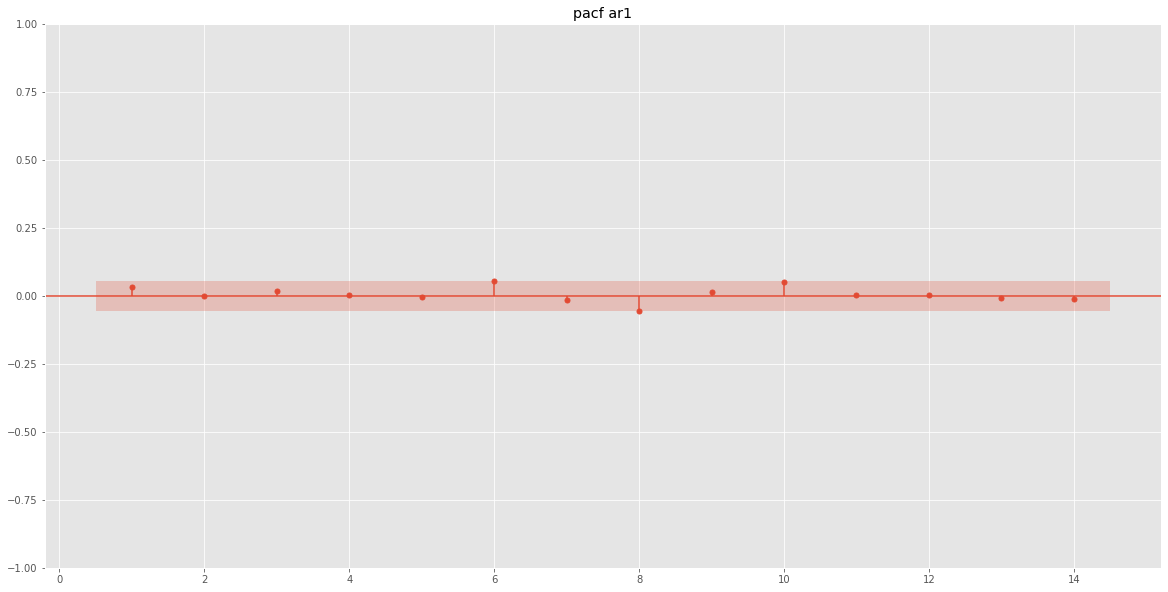

In [260]:
fig = sm.tsa.graphics.plot_pacf(df_train_close['Close_Diff'], lags=range(1,15), alpha=0.05, title = 'pacf ar1')

### <i> Now, we can take the stationary test (Augmented Dickey-Fuller) </i>

In [261]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df_train_close['Close'])
adf, pvalue, critical_values

(-2.0595156654402698,
 0.2611019016689027,
 {'1%': -3.4355671297788666,
  '5%': -2.8638438984080117,
  '10%': -2.5679966213893057})

Our adf value is not very negative and p value is high (bigger than 0.05). Therefore it is not stationary yet.

In [262]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df_train_close['Close_Diff'])
adf, pvalue, critical_values


(-34.20694173971659,
 0.0,
 {'1%': -3.4355671297788666,
  '5%': -2.8638438984080117,
  '10%': -2.5679966213893057})

In [263]:
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title = 'Rolling Mean and Standard Deviation'
    plt.grid()
    plt.show(block=False)

Test Statistic            -2.059516
p-value                    0.261102
Lags Used                  0.000000
Observations Used       1256.000000
Critical Value (1%)       -3.435567
Critical Value (5%)       -2.863844
Critical Value (10%)      -2.567997
dtype: float64


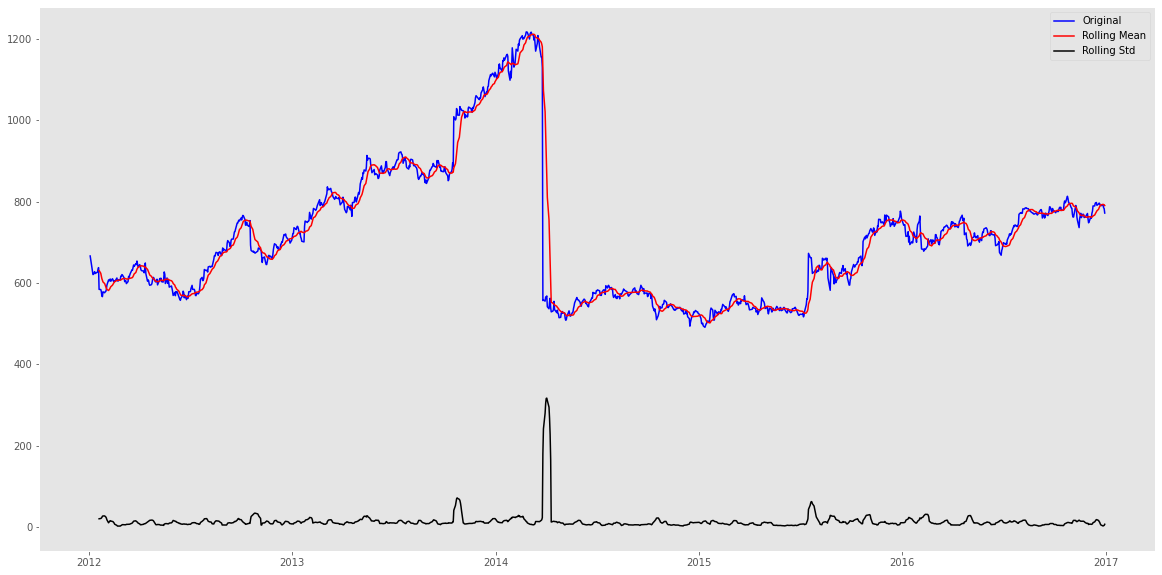

In [264]:

# run DFT on monthly
dftest(df_train_close['Close'])
# p-value allows us to reject a unit root: data is stationary

## 6. Smoothing

In [265]:
def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"

    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff) / len(observations)

    return mse

### <i>  I. Simple Smoothing - put average </i>

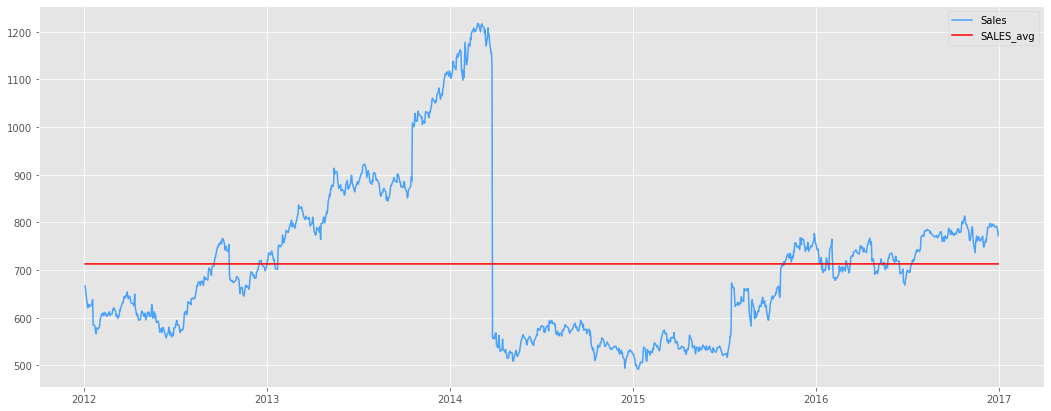

Mean Square Error: 27141.498326421763


In [266]:
# find mean of series
time_series_avg = np.mean(df_train_close['Close'])

# create array of mean value equal to length of time array
df_train_close['Close_avg'] = np.full(shape=len(df_train_close), fill_value=time_series_avg, dtype='float')

fig, ax = plt.subplots(figsize=(18,7))
ax.plot(df_train_close['Close'], c='#48A1FA')
ax.plot(df_train_close['Close_avg'], c='red')
plt.legend(['Sales', 'SALES_avg'])
plt.show()

print(f"Mean Square Error: {mse(np.array(df_train_close['Close']), np.array(df_train_close['Close_avg']))}")

df_train_close.drop(['Close_avg'], axis=1, inplace=True)

### <i>  II. Moving Average Smoothing </i>

In [267]:
def moving_average(observations, window=3, forecast=False):
    '''returns the smoothed version of an array of observations.'''
    cumulative_sum = np.cumsum(observations, dtype=float)
    cumulative_sum[window:] = cumulative_sum[window:] - cumulative_sum[:-window]
    if forecast:
        return np.insert(cumulative_sum[window - 1:] / window, 0, np.zeros(3))
    else:
        return cumulative_sum[window - 1:] / window

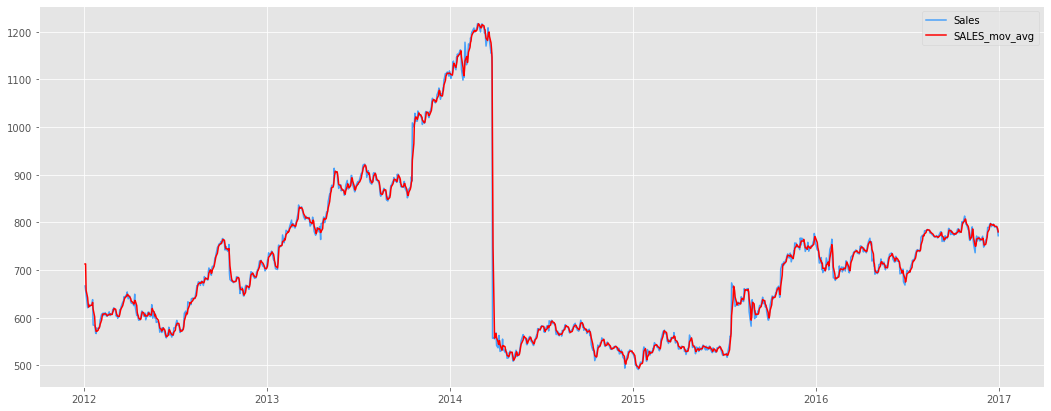

Mean Square Error: 214.26717867869854


In [268]:
mean = np.mean(df_train_close['Close'])
close_mov_avg = moving_average(np.array(df_train_close['Close']), window=3, forecast=False)
close_mov_avg = np.insert(close_mov_avg,[0],[mean,mean])
df_train_close['Close_mov_avg']  = close_mov_avg

fig, ax = plt.subplots(figsize=(18,7))
ax.plot(df_train_close['Close'], c='#48A1FA')
ax.plot(df_train_close['Close_mov_avg'], c='red')

plt.legend(['Sales', 'SALES_mov_avg'])
plt.show()

print(f"Mean Square Error: {mse(np.array(df_train_close['Close']), np.array(df_train_close['Close_mov_avg']))}")

df_train_close.drop(['Close_mov_avg'], axis=1, inplace=True)

### <i>  III. Exponentially Weighted Moving Average </i>


In [269]:
def ewma(observations, forecast=True):
    '''returns the exponentially weighted smoothed version of an array of observations.'''
    weights = np.array([0.160, 0.294, 0.543])
    output = np.zeros_like(observations, dtype='float')

    for i, _ in enumerate(observations):
        if (i == 0) or (i == 1) or (i == len(observations) - 1):
            pass
        else:
            output[i] = np.dot(observations[i-2:i+1], weights)
    if forecast:
        return np.insert(output, 0, mean)
    else:
        return output

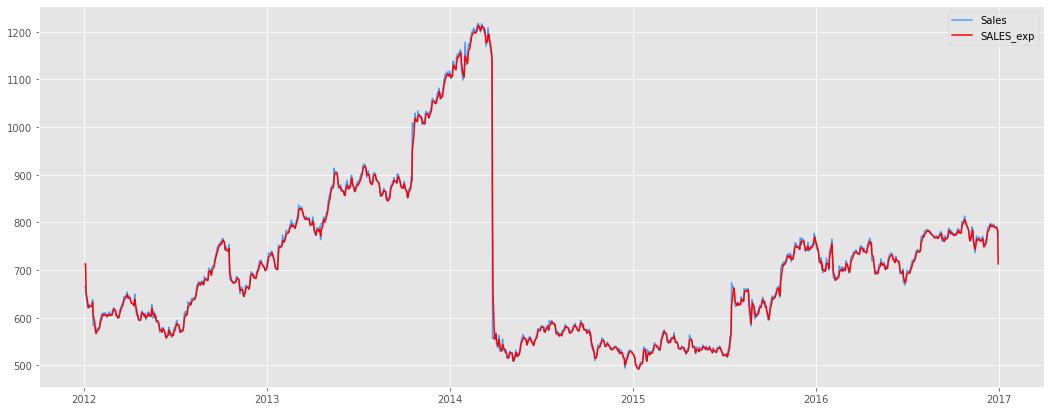

Mean Square Error: 99.79379705608982


In [270]:
mean = np.mean(df_train_close['Close'])
ewma_smoothed_vals = ewma(df_train_close['Close'], forecast=False)
np.place(ewma_smoothed_vals, ewma_smoothed_vals==0, mean)
df_train_close['Close_exp'] = ewma_smoothed_vals

fig, ax = plt.subplots(figsize=(18,7))
ax.plot(df_train_close['Close'], c='#48A1FA')
ax.plot(df_train_close['Close_exp'], c='red')

plt.legend(['Sales', 'SALES_exp'])
plt.show()

print(f"Mean Square Error: {mse(np.array(df_train_close['Close']), np.array(df_train_close['Close_exp']))}")

df_train_close.drop(['Close_exp'], axis=1, inplace=True)

We can use our new test array. We made some changes with our train and use it's.

In [271]:
# Splitting the data
train = np.array(df_train_close['Close'][:-50])
test = np.array(df_train_close['Close'][-50:])

train_time = np.array(df_train_close.index[:-50])
test_time = np.array(df_train_close.index[-50:])

#### <i> i. Simple Average </i>

In [272]:
from IPython.display import display

# find mean of series
trend_seasonal_avg = np.mean(df_train_close['Close'])

# create array of mean value equal to length of time array
simple_avg_preds = np.round(np.full(shape=len(test), fill_value=trend_seasonal_avg, dtype='float'),3)

# mse
simple_mse = mse(test, simple_avg_preds)

# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test,
              'Predictions' : simple_avg_preds}).head(10))
# results
print("MSE: ", simple_mse)

,Actual,Predictions
0,796.97,712.709
1,799.37,712.709
2,813.11,712.709
3,807.67,712.709
4,799.07,712.709
5,795.35,712.709
6,795.37,712.709
7,784.54,712.709
8,783.61,712.709
9,768.70,712.709


MSE:  4604.637043400005


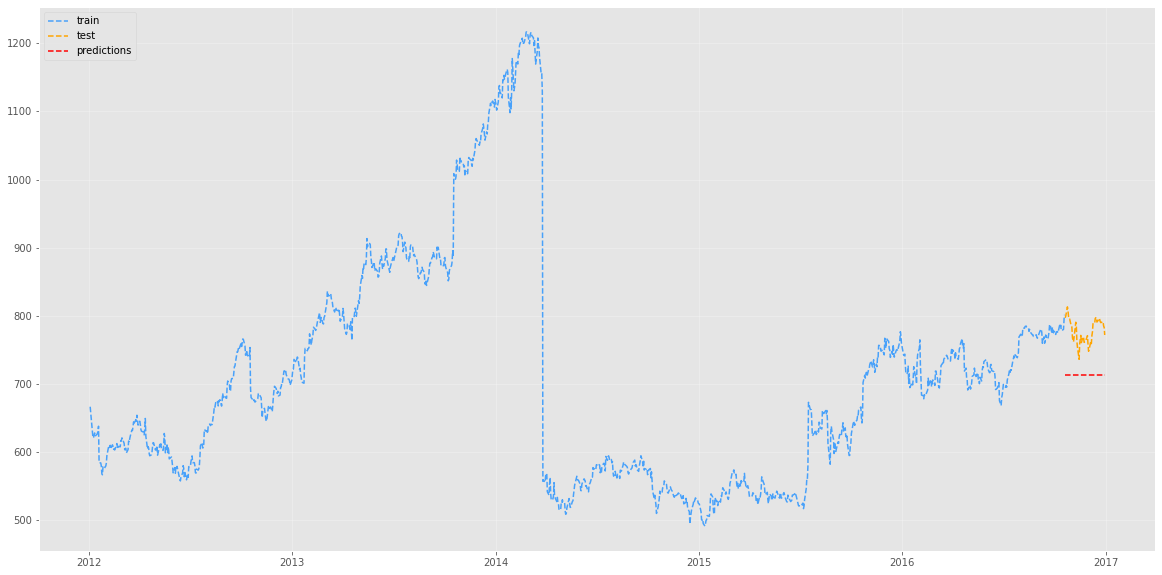

In [273]:
plt.plot(train_time, train, '#48A1FA', linestyle="--", label="train")
plt.plot(test_time, test, color='orange', linestyle="--", label="test")
plt.plot(test_time, simple_avg_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title = "Simple Average Smoothing"
plt.grid(alpha=0.3);

#### <i> ii. Single Exponential </i>

In [274]:
from statsmodels.tsa.api import SimpleExpSmoothing

single = SimpleExpSmoothing(train).fit(optimized=True)
single_preds = np.round(single.forecast(len(test)), 3)
single_mse = mse(test, single_preds)

# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test,
                      'Predictions' : single_preds}).head(10))

print("MSE: ", single_mse)

,Actual,Predictions
0,796.97,801.468
1,799.37,801.468
2,813.11,801.468
3,807.67,801.468
4,799.07,801.468
5,795.35,801.468
6,795.37,801.468
7,784.54,801.468
8,783.61,801.468
9,768.70,801.468


MSE:  833.8529427999985


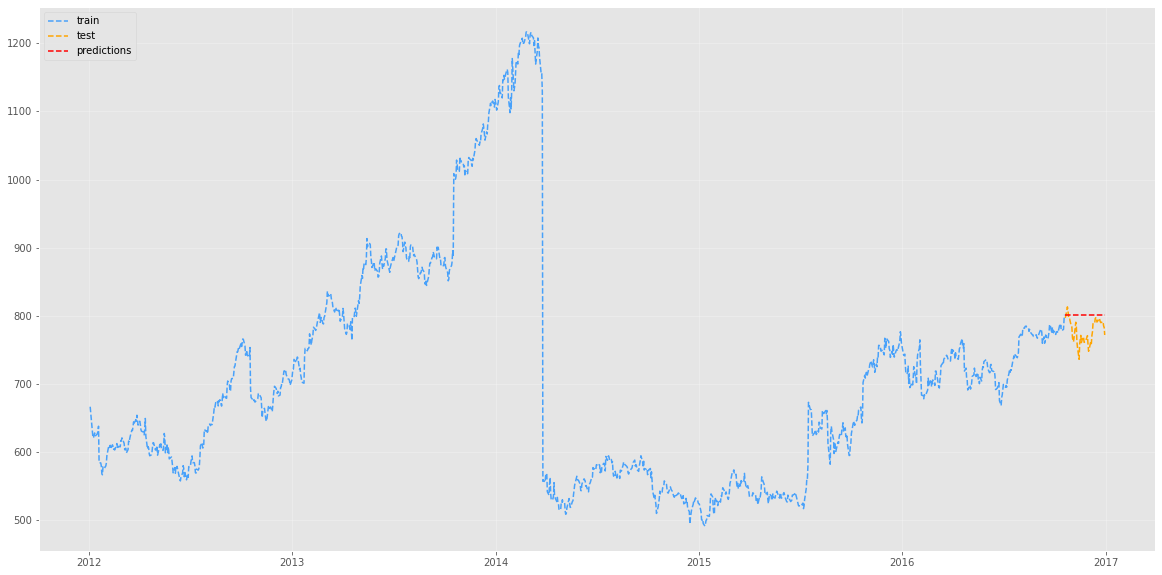

In [275]:
plt.plot(train_time, train, '#48A1FA', linestyle="--", label="train")
plt.plot(test_time, test, color='orange', linestyle="--", label="test")
plt.plot(test_time, single_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title = "Single Exponential Smoothing"
plt.grid(alpha=0.3);

#### <i> iii. Double Exponential </i>

In [276]:
from statsmodels.tsa.api import Holt

double = Holt(train).fit(optimized=True)
double_preds = double.forecast(len(test))
double_mse = mse(test, double_preds)

# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test,
                      'Predictions' : double_preds}).head(10))

print("MSE: ", double_mse)

,Actual,Predictions
0,796.97,802.435218
1,799.37,803.399754
2,813.11,804.364290
3,807.67,805.328826
4,799.07,806.293362
5,795.35,807.257898
6,795.37,808.222433
7,784.54,809.186969
8,783.61,810.151505
9,768.70,811.116041


MSE:  2773.3786250360617


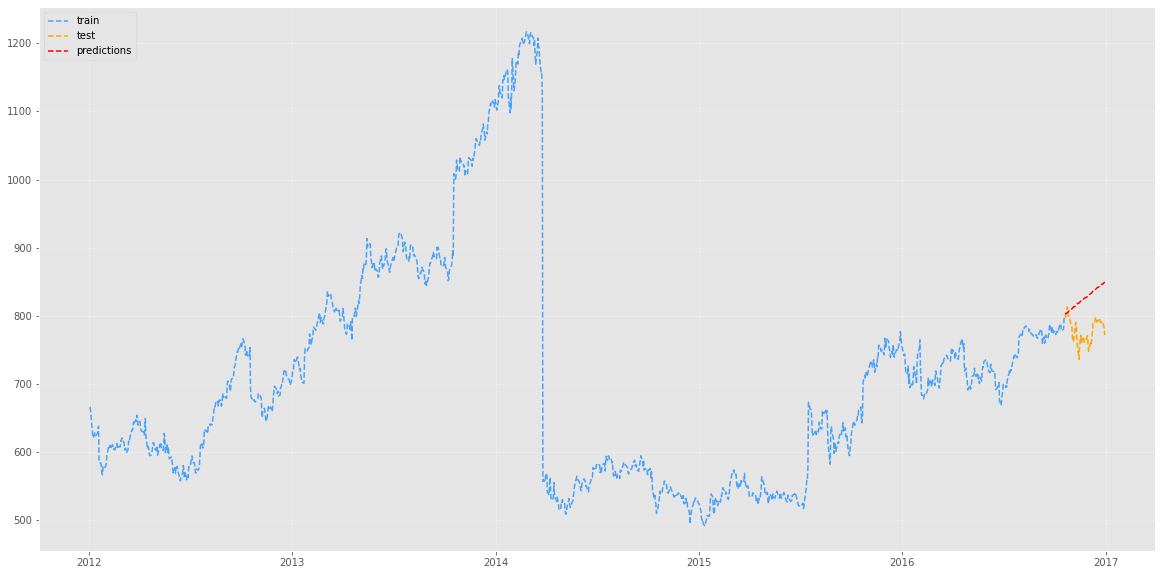

In [277]:
plt.plot(train_time, train, '#48A1FA', linestyle="--", label="train")
plt.plot(test_time, test, color='orange', linestyle="--", label="test")
plt.plot(test_time, double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title = "Double Exponential Smoothing"
plt.grid(alpha=0.3);

#### <i> iv. Triple Exponential </i>

In [278]:
from statsmodels.tsa.api import ExponentialSmoothing

triple = ExponentialSmoothing(train,
                              trend=None,
                              seasonal=None,
                              seasonal_periods=12).fit(optimized=True)
triple_preds = triple.forecast(len(test))
triple_mse = mse(test, triple_preds)
# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test,
                      'Predictions' : triple_preds}).head(10))

print("MSE: ", triple_mse)

,Actual,Predictions
0,796.97,801.489509
1,799.37,801.489509
2,813.11,801.489509
3,807.67,801.489509
4,799.07,801.489509
5,795.35,801.489509
6,795.37,801.489509
7,784.54,801.489509
8,783.61,801.489509
9,768.70,801.489509


MSE:  834.8487552467543


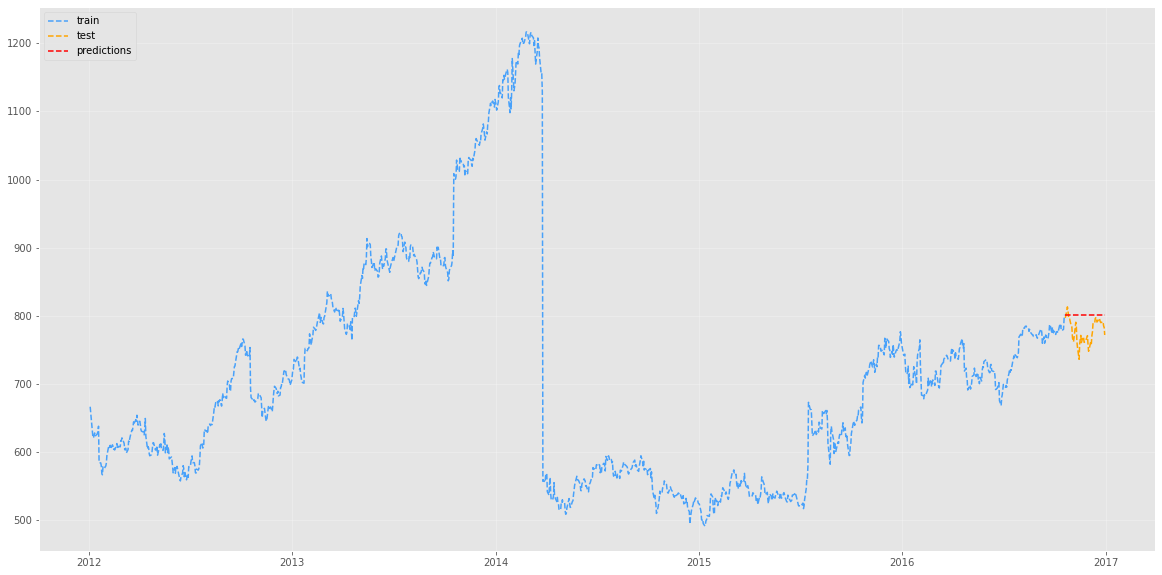

In [279]:
plt.plot(train_time, train, '#48A1FA', linestyle="--", label="train")
plt.plot(test_time, test, color='orange', linestyle="--", label="test")
plt.plot(test_time, triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title = "Triple Exponential Smoothing"
plt.grid(alpha=0.3);

In [280]:
data_dict = {'MSE':[simple_mse, single_mse, double_mse, triple_mse]}
df = pd.DataFrame(data_dict, index=['simple', 'single', 'double', 'triple'])
display(df)

,MSE
simple,4604.637043
single,833.852943
double,2773.378625
triple,834.848755


## 7. Forecasting with SARIMA Model

In [282]:
import statsmodels.api as sm

# define helper plot function for visualization
def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))

    raw.plot(data, c='#48A1FA')
    sm.tsa.graphics.plot_acf(data, lags=lags, ax=acf, zero=False, c='#48A1FA')
    sm.tsa.graphics.plot_pacf(data, lags=lags, ax=pacf, zero = False, c='#48A1FA')
    sns.despine()
    plt.tight_layout()

In [283]:
df_train_close.columns

Index(['Close', 'Close_Diff'], dtype='object')

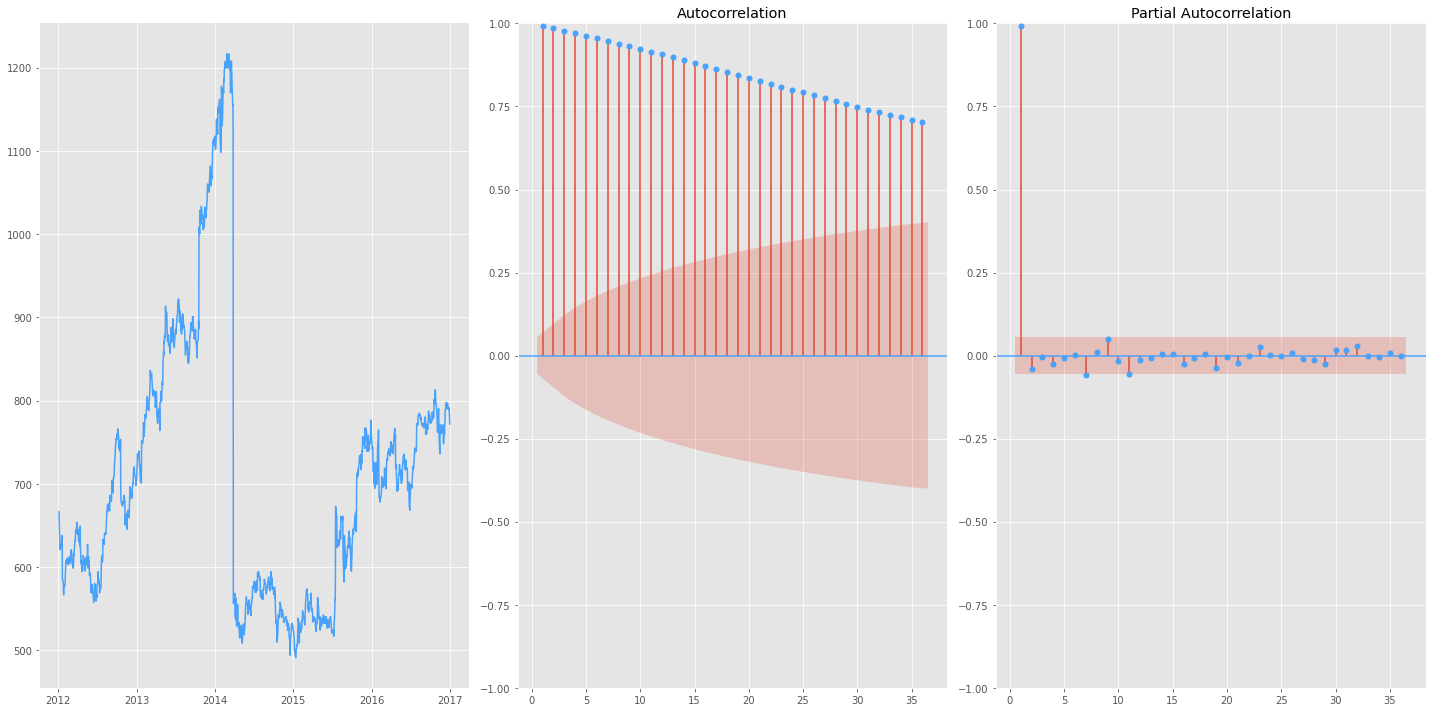

In [284]:
# helper plot for monthly temps
plots(df_train_close['Close'], lags=36);
# we note a 12-period cycle (yearly) with suspension bridge design, so must use SARIMA

In [290]:

# we might need to install dev version for statespace functionality
#!pip install git+https://github.com/statsmodels/statsmodels.git

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(df_train_close['Close'],
                                order=(1,0,0),
                                seasonal_order=(0,1,1,12),
                                trend='c').fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Close   No. Observations:                 1257
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -5470.481
Date:                              Sat, 17 Sep 2022   AIC                          10948.962
Time:                                      03:13:00   BIC                          10969.469
Sample:                                           0   HQIC                         10956.673
                                             - 1257                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0025      0.023      0.108      0.914      -0.043       0.048
ar.L1          0.9941      0.006    158.408      0.000       0.982       1.006
ma.S.L12      -0.9992      0.509     -1.964      0.050      -1.996      -0.002
sigma2       367.2264    181.934      2.018      0.044      10.642     723.811
===================================================================================
Ljung-Box (L1) (Q):                   1.58   Jarque-Bera (JB):          18482114.14
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                           -20.01
Prob(H) (two-sided):                  0.00   Kurtosis:                       598.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

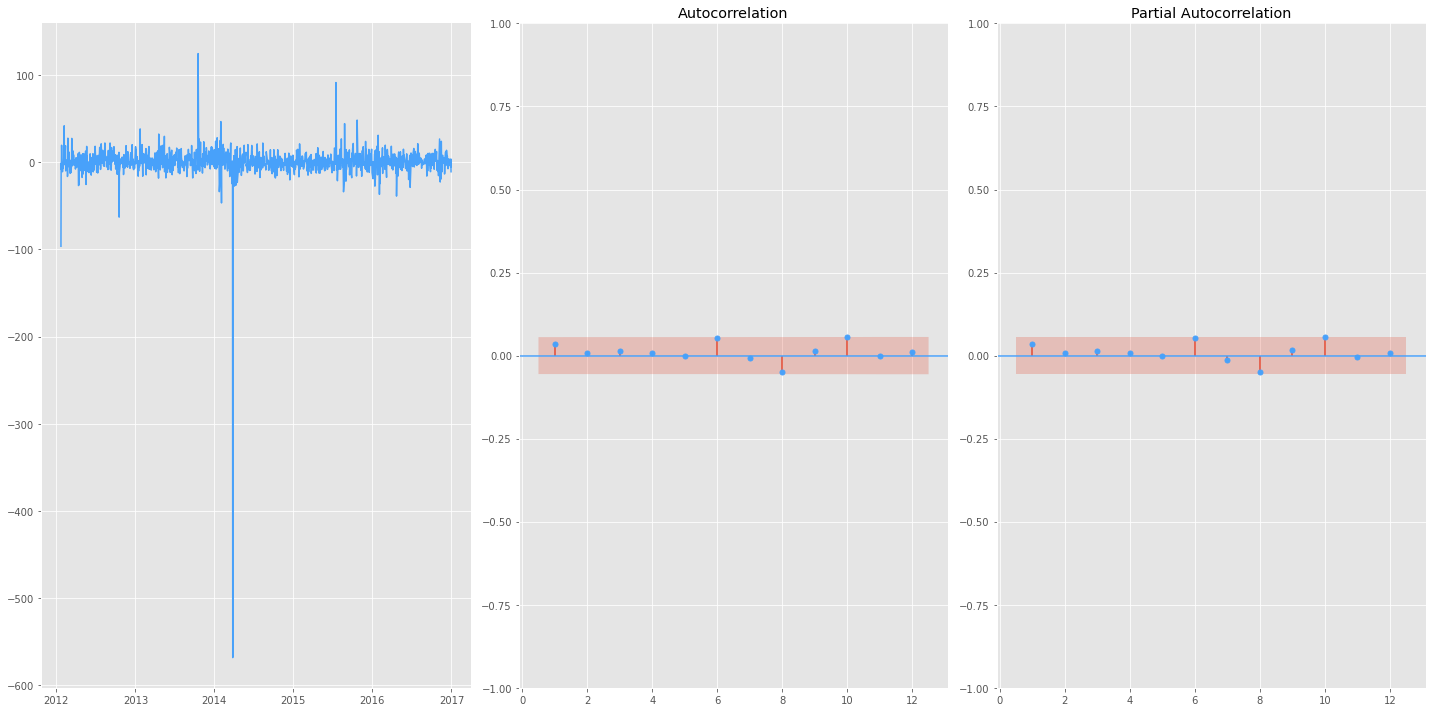

In [291]:
# plot resids
plots(sar.resid[sar.loglikelihood_burn:], lags=12);

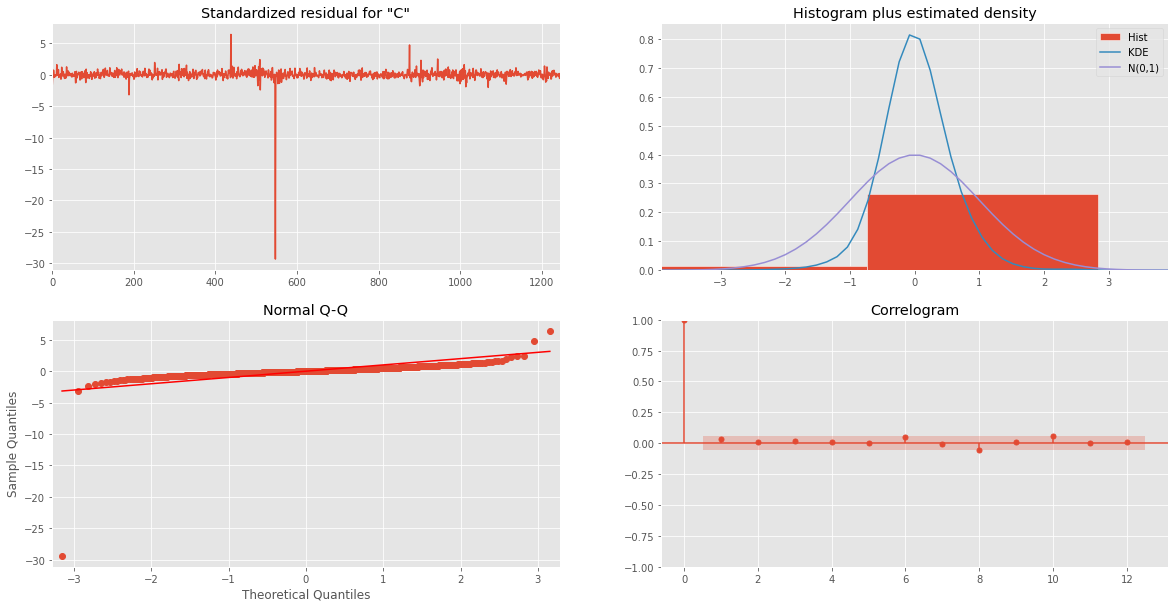

In [292]:
# plot residual diagnostics
sar.plot_diagnostics(lags=12,figsize = (20,10),);

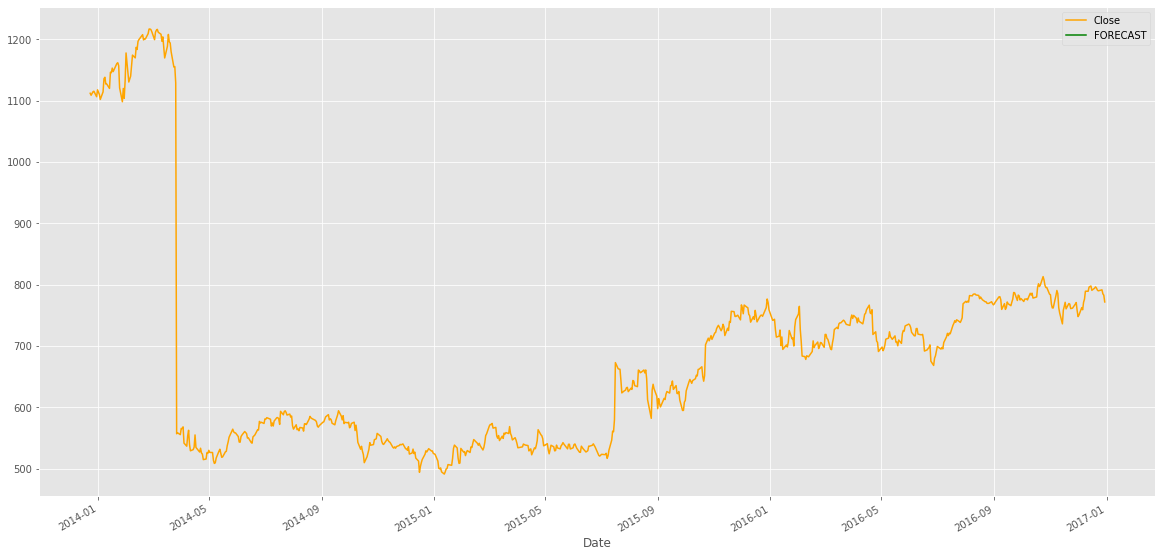

In [313]:

# plot predictions
pd.plotting.register_matplotlib_converters()
#use model.predict() start and end in relation to series
df_train_close['FORECAST'] = sar.predict(start = 500, end= df_train_close.shape[0])
df_train_close[495:][['Close', 'FORECAST']].plot(color = ('orange','g'));

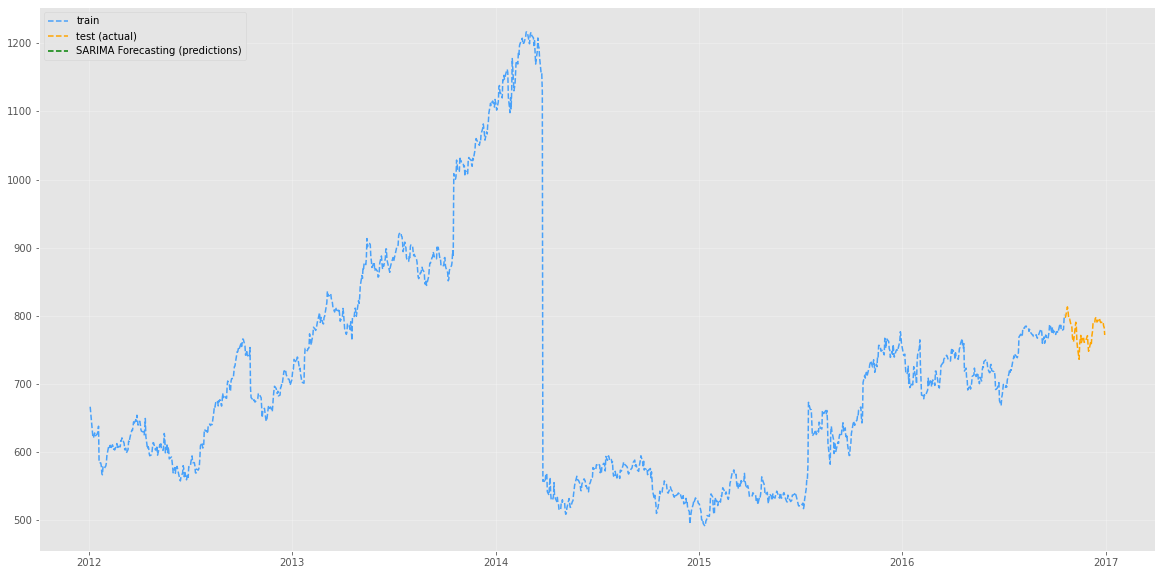

In [314]:
plt.plot(df_train_close['Close'][:-50], '#48A1FA', linestyle="--", label="train")
plt.plot(df_train_close['Close'][-50:], color='orange', linestyle="--", label="test (actual)")
plt.plot(df_train_close['FORECAST'], 'g--', label="SARIMA Forecasting (predictions)")
plt.legend(loc='upper left')
plt.title = "SARIMA Model"
plt.grid(alpha=0.3);

In [316]:
# create and run statistical tests on model
norm_val, norm_p, skew, kurtosis = sar.test_normality('jarquebera')[0]
lb_val, lb_p = sar.test_serial_correlation(method='ljungbox',)[0]
het_val, het_p = sar.test_heteroskedasticity('breakvar')[0]


# we want to look at largest lag for Ljung-Box, so take largest number in series
# there's intelligence in the method to determine how many lags back to calculate this stat
lb_val = lb_val[-1]
lb_p = lb_p[-1]
durbin_watson = sm.stats.stattools.durbin_watson(
    sar.filter_results.standardized_forecasts_error[0, sar.loglikelihood_burn:])

print('Normality: val={:.3f}, p={:.3f}'.format(norm_val, norm_p));
print('Ljung-Box: val={:.3f}, p={:.3f}'.format(lb_val, lb_p));
print('Heteroskedasticity: val={:.3f}, p={:.3f}'.format(het_val, het_p));
print('Durbin-Watson: d={:.2f}'.format(durbin_watson))

Normality: val=18482114.145, p=0.000
Ljung-Box: val=17.801, p=0.813
Heteroskedasticity: val=1.342, p=0.003
Durbin-Watson: d=1.93


## 8. Forecasting with Deep Learning Models

In [328]:
df_train_close.drop('Close_Diff', axis=1, inplace=True)

In [330]:
# Checking CUDA
import torch
import torchvision

if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print("CUDA is available")

CUDA is available


In [331]:
# Let's control our GPU
!nvidia-smi

Sat Sep 17 03:36:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P0    13W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Let's scale our data at first

In [349]:
timesteps = 50
train = df_train_close[:len(df_train_close)-timesteps]['Close'].values
test = df_train_close[len(train):]['Close'].values
train=train.reshape(train.shape[0],1)
test=test.reshape(test.shape[0],1)

In [350]:
sc = MinMaxScaler(feature_range= (0,1))
train = sc.fit_transform(train)

In [351]:
test.shape , train.shape

((50, 1), (1207, 1))

In [352]:
train_X = []
train_y = []

for i in range(timesteps, train.shape[0]):
    train_X.append(train[i-timesteps:i,0])
    train_y.append(train[i,0])

train_X = np.array(train_X)
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
train_y = np.array(train_y)

In [353]:
print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))

Training input shape: (1157, 50, 1)
Training output shape: (1157,)


In [354]:
inputs = df_train_close[len(df_train_close) - len(test) - timesteps:]
inputs = sc.transform(inputs)

test_X = []

for i in range(timesteps, 100):
    test_X.append(inputs[i-timesteps:i,0])

test_X = np.array(test_X)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)

In [355]:
test_X.shape

(50, 50, 1)

### <i> Train models </i>

- Simple RNN layers each with 50 hidden units and tanh activation function per cell
- LSTM with 70 hidden units per cell
- Define the loss function and optimizer strategy
- Fit the model with 100 epochs
- Predict and plot the results

### RNN

In [356]:
model = Sequential()

model.add(SimpleRNN(50, activation='tanh',
                    input_shape=(train_X.shape[1],1), return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, activation='tanh', return_sequences = True,))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, activation='tanh', return_sequences = True,))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, activation='tanh'))
# output layer to make final predictions
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
37/37 [==============================] - 14s 276ms/step - loss: 0.1274
Epoch 2/100
37/37 [==============================] - 10s 279ms/step - loss: 0.0314
Epoch 3/100
37/37 [==============================] - 10s 274ms/step - loss: 0.0178
Epoch 4/100
37/37 [==============================] - 11s 285ms/step - loss: 0.0135
Epoch 5/100
37/37 [==============================] - 10s 279ms/step - loss: 0.0110
Epoch 6/100
37/37 [==============================] - 10s 276ms/step - loss: 0.0097
Epoch 7/100
37/37 [==============================] - 10s 267ms/step - loss: 0.0089
Epoch 8/100
37/37 [==============================] - 10s 268ms/step - loss: 0.0079
Epoch 9/100
37/37 [==============================] - 10s 281ms/step - loss: 0.0068
Epoch 10/100
37/37 [==============================] - 10s 266ms/step - loss: 0.0075
Epoch 11/100
37/37 [==============================] - 10s 270ms/step - loss: 0.0065
Epoch 12/100
37/37 [==============================] - 10s 266ms/step - loss: 0.0052
E

In [364]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5

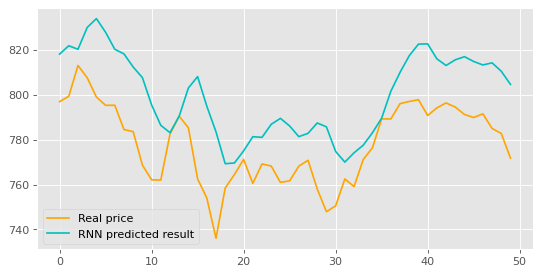

In [365]:
predicted = model.predict(test_X)
predicted = sc.inverse_transform(predicted)

plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real price")
plt.plot(predicted,color="c",label="RNN predicted result")
plt.legend()
plt.grid(True)
plt.show()

### LSTM

In [366]:
model2 = Sequential()
model2.add(LSTM(75, input_shape=(train_X.shape[1],1)))
model2.add(Dense(1))

model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(train_X, train_y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
37/37 [==============================] - 3s 9ms/step - loss: 0.0208
Epoch 2/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 3/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 4/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 5/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 6/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 7/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 8/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 9/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 10/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 11/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 12/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 13/100
37/37 [=================

In [367]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 75)                23100     
                                                                 
 dense_1 (Dense)             (None, 1)                 76        
                                                                 
Total params: 23,176
Trainable params: 23,176
Non-trainable params: 0
_________________________________________________________________


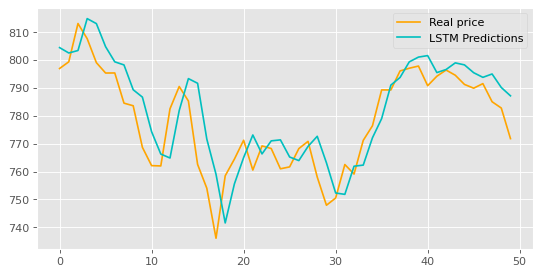

In [368]:
predicted2 = model2.predict(test_X)
predicted2 = sc.inverse_transform(predicted2)

plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real price")
plt.plot(predicted2,color="c",label="LSTM Predictions")
plt.legend()
plt.grid(True)
plt.show()

# Results

There are more trainable parameters for the LSTM, which explains why it takes longer to train this model, when we compare the model summary for Simple RNN with the model summary for LSTM.

Overall, the charts demonstrate that our LSTM model, while having a simpler structure, outperformed our Simple RNN.

# What can do for better results?

We would need to employ additional data and more advanced LSTM model architectures in order to increase the accuracy of forecasts over several time steps. We may try expanding the cell units, training with more data, or performing more training epochs.